In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os 
import sklearn
import shap 
import time
import math
import seaborn as sns
import pathlib
import statistics
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
font_size_plot = 12
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.labelweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.size'] = font_size_plot

path = os.path.abspath('')
os.chdir(f'{path}')

metric_list = ['MAE','MSE','RMSE','R2','MAPE']

# fpi

         MAE          MSE       RMSE        R2      MAPE      TIME SHUFFLE
5  47.510933  3979.945755  63.086811  0.457581  0.686395  0.001527      %P
6  47.731743  4025.195939  63.444432  0.451414  0.721597  0.001527      %B
4  49.537044  4388.811629  66.248107  0.401857  0.701475  0.001527      %S
0  50.862717  4570.091296   67.60245  0.377151  0.777247  0.001527      DG
7  51.246188  4669.349233  68.332637  0.363623  0.714216  0.001527      CD
3  51.905039  4605.588964   67.86449  0.372313   0.72549  0.001527      %O
8  52.129364  4936.790196  70.262296  0.327174  0.775339  0.001527    CONC
1  54.421659  5111.661483  71.495884  0.303341  0.754805  0.001527      SA
2  56.008625  5435.924539  73.728723  0.259148  0.841612  0.001527      %N
         MAE          MSE       RMSE        R2      MAPE      TIME SHUFFLE
5  47.510933  3979.945755  63.086811  0.457581  0.686395  0.001527      %P
6  47.731743  4025.195939  63.444432  0.451414  0.721597  0.001527      %B
4  49.537044  4388.811629

KeyboardInterrupt: 

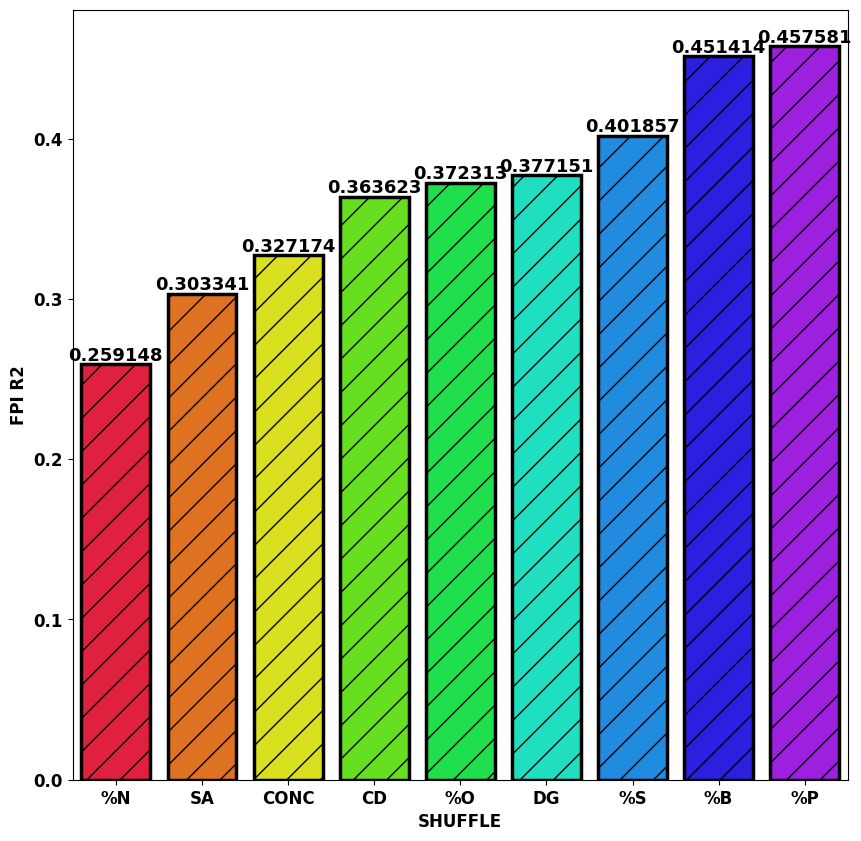

In [4]:
meta_model = 'LIN'
method = 'FPI'
results_path = '\\'.join(path.split('\\')[:-1])+f'\\best tuned model and method\\Results'
results_path = f'{results_path}\\{method}CSVMETA{meta_model}\\RESULTS{method}{meta_model}.csv'
results_dataframe = pd.read_csv(results_path)
unique_shuffle_list = results_dataframe['SHUFFLE'].unique()
for metric in metric_list:
    plot_dataframe = pd.DataFrame()
    for unique_shuffle in unique_shuffle_list:
        interested_dataframe = results_dataframe[results_dataframe['SHUFFLE']==unique_shuffle].drop(['ORDER','SHUFFLE'],axis='columns').mean()
        interested_dataframe['SHUFFLE'] = unique_shuffle
        interested_dataframe = interested_dataframe.to_frame().transpose()
        plot_dataframe = pd.concat([interested_dataframe,plot_dataframe],axis='rows')
    plot_dataframe = plot_dataframe.reset_index(drop=True).drop(['SEED'],axis='columns').sort_values(by=metric)
    print(plot_dataframe)
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot2grid((1,1),(0,0),fig=fig)
    color_map = plt.get_cmap('gist_rainbow')
    color_list = [color_map((x/len(plot_dataframe.index))) for x in range(len(plot_dataframe.index))]
    sns.barplot(x='SHUFFLE',y=metric,data=plot_dataframe,hue='SHUFFLE',legend=False,palette=color_list,linewidth=2.5,edgecolor='black',hatch='/')
    ax.set_ylabel(f'FPI {metric}')
    for container in ax.containers:
        ax.bar_label(container,fontsize=13)
    fig.savefig(f'FPI{metric}.jpg',dpi=fig.dpi,bbox_inches='tight')
    plt.close()

In [11]:
meta_model = 'LIN'
method = 'FPI'
results_path = '\\'.join(path.split('\\')[:-1])+f'\\best tuned model and method\\Results'
results_path = f'{results_path}\\{method}CSVMETA{meta_model}\\RESULTS{method}{meta_model}.csv'
results_dataframe = pd.read_csv(results_path)
unique_shuffle_list = results_dataframe['SHUFFLE'].unique()
fig = plt.figure(figsize=(10,10))
max_col = 2
max_row = 2
current_row = -1
current_col = 0
count = -1
for metric in metric_list:
    if metric != 'MAE':
        count = count + 1
        plot_dataframe = pd.DataFrame()
        for unique_shuffle in unique_shuffle_list:
            interested_dataframe = results_dataframe[results_dataframe['SHUFFLE']==unique_shuffle].drop(['ORDER','SHUFFLE'],axis='columns').mean()
            interested_dataframe['SHUFFLE'] = unique_shuffle
            interested_dataframe = interested_dataframe.to_frame().transpose()
            plot_dataframe = pd.concat([interested_dataframe,plot_dataframe],axis='rows')
        plot_dataframe = plot_dataframe.reset_index(drop=True).drop(['SEED'],axis='columns').sort_values(by=metric)
        print(plot_dataframe)
        current_row += 1
        if current_row == max_row:
            current_row = 0
            current_col += 1
        ax = plt.subplot2grid((max_col,max_row),(current_col,current_row),fig=fig)
        color_map = plt.get_cmap('gist_rainbow')
        color_list = [color_map((x/len(plot_dataframe.index))) for x in range(len(plot_dataframe.index))]
        sns.barplot(x='SHUFFLE',y=metric,data=plot_dataframe,hue='SHUFFLE',legend=False,palette=color_list,linewidth=2.5,edgecolor='black',hatch='/')
        ax.set_ylabel(f'FPI {metric}')
        for container in ax.containers:
            ax.bar_label(container,fontsize=5.5)
        ax_label = 'abcdefghijklmnopqrstuvwxyz'
        ax.text(x=-0.1,y=1.05,s=f'{ax_label[count]})',transform=ax.transAxes,size=font_size_plot)
fig.savefig(f'AllFPI{metric}.jpg',dpi=fig.dpi,bbox_inches='tight')
plt.close()

         MAE          MSE       RMSE        R2      MAPE      TIME SHUFFLE
5  47.510933  3979.945755  63.086811  0.457581  0.686395  0.001527      %P
6  47.731743  4025.195939  63.444432  0.451414  0.721597  0.001527      %B
4  49.537044  4388.811629  66.248107  0.401857  0.701475  0.001527      %S
0  50.862717  4570.091296   67.60245  0.377151  0.777247  0.001527      DG
3  51.905039  4605.588964   67.86449  0.372313   0.72549  0.001527      %O
7  51.246188  4669.349233  68.332637  0.363623  0.714216  0.001527      CD
8  52.129364  4936.790196  70.262296  0.327174  0.775339  0.001527    CONC
1  54.421659  5111.661483  71.495884  0.303341  0.754805  0.001527      SA
2  56.008625  5435.924539  73.728723  0.259148  0.841612  0.001527      %N
         MAE          MSE       RMSE        R2      MAPE      TIME SHUFFLE
5  47.510933  3979.945755  63.086811  0.457581  0.686395  0.001527      %P
6  47.731743  4025.195939  63.444432  0.451414  0.721597  0.001527      %B
4  49.537044  4388.811629

# PDP

In [28]:
meta_model = 'LIN'
method_list = ['PDPMEAN','PDPMEDIAN']
plot_dataframe_list = []
for method in method_list:
    results_path = '\\'.join(path.split('\\')[:-1])+f'\\best tuned model and method\\Results'
    results_path = f'{results_path}\\{method}CSVMETA{meta_model}\\RESULTS{method}{meta_model}.csv'
    results_dataframe = pd.read_csv(results_path)
    print(results_dataframe)
    unique_index_list = results_dataframe['INDEX'].unique()
    plot_dataframe = pd.DataFrame()
    for unique_index in unique_index_list:
        interested_dataframe = results_dataframe[results_dataframe['INDEX']==unique_index].drop(['PDPVALUES','ORDER'],axis='columns').mean()
        interested_dataframe = interested_dataframe.to_frame().transpose()
        plot_dataframe = pd.concat([interested_dataframe,plot_dataframe],axis='rows')
    plot_dataframe = plot_dataframe.reset_index(drop=True).drop(['SEED'],axis='columns')
    plot_dataframe_list.append(plot_dataframe)
print(plot_dataframe_list)
additional_dataframe_path = '\\'.join(results_path.split('\\')[:-1])+f'\\ADDITIONAL{method}{meta_model}.csv'
additional_dataframe = pd.read_csv(additional_dataframe_path)
additional_plot_dataframe_max = additional_dataframe[additional_dataframe['TYPE']=='MAX'].drop(['ORDER','TYPE'],axis='columns').mean().copy()
additional_plot_dataframe_min = additional_dataframe[additional_dataframe['TYPE']=='MIN'].drop(['ORDER','TYPE'],axis='columns').mean().copy()
additional_plot_dataframe = pd.concat([additional_plot_dataframe_max,additional_plot_dataframe_min],axis='columns').rename({0:'MAX',1:'MIN'},axis='columns')
additional_plot_dataframe.index = [f'PDP_{index}_CAP' for index in additional_plot_dataframe.index]
print(additional_plot_dataframe)

    PDP_CONC_CAP  PDP_CD_CAP  PDP_%B_CAP  PDP_%P_CAP  PDP_%S_CAP  PDP_%O_CAP  \
0     185.181511  203.773105  165.482680  166.403419  165.187205  170.747251   
1     164.720141  163.934585  166.785532  162.682677  206.168884  164.590592   
2     164.816284  155.821410  173.259415  178.673331  240.628326  164.992205   
3     202.962526  155.411282  173.615529  179.498132  242.522135  156.959832   
4     174.788346  144.832960  181.962465  164.645328  227.191338  154.195471   
5     174.884490  179.029692  183.265317  168.853697  232.089707  170.441108   
6     174.980633  178.000319  182.912507  172.640625  236.988076  170.190342   
7     175.076777  174.779153  184.215359  172.050588  268.055700  169.939576   
8     166.181176  169.932128  185.518210  171.460551  287.132547  164.420797   
9     166.277320  163.349669  194.858543  164.404405  292.030916  164.170031   
10    166.373463  160.128502  196.161395  160.954590  296.929285  163.919264   
11    185.181511  203.773105  165.482680

Index(['PDP_CONC_CAP', 'PDP_CD_CAP', 'PDP_%B_CAP', 'PDP_%P_CAP', 'PDP_%S_CAP',
       'PDP_%O_CAP', 'PDP_%N_CAP', 'PDP_SA_CAP', 'PDP_DG_CAP'],
      dtype='object')
10     0.0
9      1.0
8      2.0
7      3.0
6      4.0
5      5.0
4      6.0
3      7.0
2      8.0
1      9.0
0     10.0
Name: INDEX, dtype: float64 10    185.181511
9     164.720141
8     164.816284
7     202.962526
6     174.788346
5     174.884490
4     174.980633
3     175.076777
2     166.181176
1     166.277320
0     166.373463
Name: PDP_CONC_CAP, dtype: float64
10     0.0
9      1.0
8      2.0
7      3.0
6      4.0
5      5.0
4      6.0
3      7.0
2      8.0
1      9.0
0     10.0
Name: INDEX, dtype: float64 10    194.752518
9     194.848662
8     194.944805
7     195.040948
6     207.378253
5     207.474397
4     207.570540
3     207.666683
2     196.709033
1     196.805176
0     196.901319
Name: PDP_CONC_CAP, dtype: float64
10     0.0
9      1.0
8      2.0
7      3.0
6      4.0
5      5.0
4      6.0
3      7.0
2    

invalid value encountered in log10
invalid value encountered in log10
invalid value encountered in log10


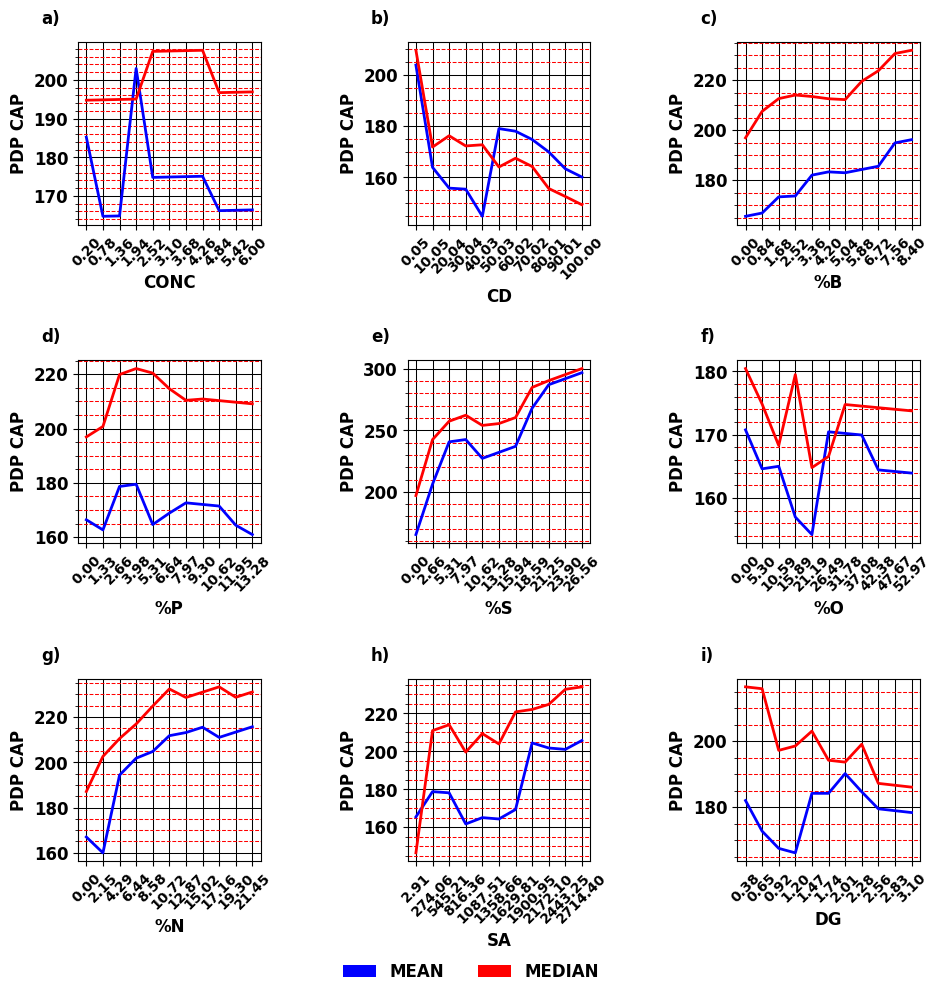

In [29]:
plot_features = plot_dataframe.drop(['INDEX'],axis='columns').columns
print(plot_features)
color_list = ['blue','red']
legend_list = ['MEAN','MEDIAN']
max_row = int(np.ceil(np.sqrt(len(plot_features))))
max_col = max_row
current_row = 0
current_col = -1
fig = plt.figure(figsize=(10,10))
for feature_count,features in enumerate(plot_features):
    current_col = current_col + 1
    if current_col == max_col:
        current_col = 0
        current_row = current_row + 1
    ax = plt.subplot2grid((max_row,max_col),(current_row,current_col),fig=fig)
    for count,plot_dataframe in enumerate(plot_dataframe_list):
        print(plot_dataframe['INDEX'][::-1],plot_dataframe[features][::-1]) # reverse as results for PDP concat is reversed
        ax.plot(plot_dataframe['INDEX'][::-1],plot_dataframe[features][::-1],linewidth=2,color=color_list[count],label=legend_list[count])
    min_x = additional_plot_dataframe['MIN'].loc[features]
    max_x = additional_plot_dataframe['MAX'].loc[features]
    length = len(plot_dataframe['INDEX'])
    label_list = np.arange(min_x,max_x+min_x,(max_x-min_x)/(length-1)).tolist()
    if len(label_list) == length-1:
        label_list.append(max_x)
    elif len(label_list) == length+1:
        label_list = label_list[:-1]
    label_list = [f'{string:.2f}' for string in label_list]
    ax.set_xticks(plot_dataframe['INDEX'],labels=label_list[::-1],rotation=45,size=10) # flip because index is flipped

    ax.set_xlabel(f'{features.split("_")[1]}')
    ax.set_ylabel('PDP CAP')
    ax.set_box_aspect(1)

    ax_label = 'abcdefghijklmnopqrstuvwxyz'
    ax.text(x=-0.2,y=1.1,s=f'{ax_label[feature_count]})',transform=ax.transAxes,size=font_size_plot)

    plt.minorticks_on()
    plt.grid(which='major',color='black',linestyle='-',linewidth=0.75,zorder=-1)
    plt.grid(which='minor',color='red',linestyle='--',linewidth=0.75,zorder=-1)

patch_list = []
for unique_code_index,unique_code_name in enumerate(legend_list):
    model_patch = matplotlib.patches.Patch(label=f'{unique_code_name}',facecolor=color_list[unique_code_index])
    patch_list.append(model_patch)
plot_model_legend = fig.legend(handles=patch_list,loc='lower center',ncol=2,prop={'size':12},labelcolor='black',framealpha=0,borderpad=0)
plot_model_legend.get_frame().set_linewidth(0.0)

fig.tight_layout(rect=[0,0.02,1,1])

fig.savefig('PDP.jpg',dpi=fig.dpi)

# shap

In [30]:
meta_model = 'LIN'
method = 'SHAP'
results_path = '\\'.join(path.split('\\')[:-1])+f'\\best tuned model and method\\Results'
results_path = f'{results_path}\\{method}CSVMETA{meta_model}\\RESULTS{method}{meta_model}.csv'
results_dataframe = pd.read_csv(results_path)
results_dataframe = results_dataframe.drop(['SEED','ORDER'],axis='columns')
print(results_dataframe.to_string())
additional_dataframe_path = '\\'.join(results_path.split('\\')[:-1])+f'\\ADDITIONAL{method}{meta_model}.csv'
additional_dataframe = pd.read_csv(additional_dataframe_path)
additional_dataframe = additional_dataframe.drop(['SEED','ORDER'],axis='columns')
print(additional_dataframe.to_string())

            DG        SA        %N        %O        %S        %P        %B        CD          CONC  INDEX
0    -0.000934 -0.007087  0.003226 -0.000855 -0.005637  0.003846 -0.001859  0.019440  3.053654e-03      0
1    -0.005228 -0.034829  0.004306  0.001291 -0.005080  0.000850 -0.005240  0.015831 -1.717654e-02      1
2     0.003299 -0.018783 -0.001134 -0.004358 -0.005648  0.000501 -0.003591 -0.028060 -1.980968e-02      2
3    -0.004239 -0.037690  0.005443 -0.003552 -0.004911  0.000792 -0.005679  0.012862 -5.254057e-03      3
4     0.001488 -0.023186  0.002727 -0.013691 -0.004831  0.000706 -0.003688 -0.029138 -8.518172e-03      4
5    -0.004309 -0.033531  0.005920  0.001702 -0.005048  0.000847 -0.004948  0.018877 -1.423818e-02      5
6    -0.000143 -0.018506 -0.000606 -0.000401 -0.005368  0.000385 -0.003597 -0.030657 -1.546887e-02      6
7    -0.005088 -0.035714  0.004254  0.001120 -0.005010  0.000840 -0.005203  0.018782 -1.539725e-02      7
8    -0.001512 -0.019425 -0.001943 -0.000838 -

0.1660854427409137
-0.0661372815530738


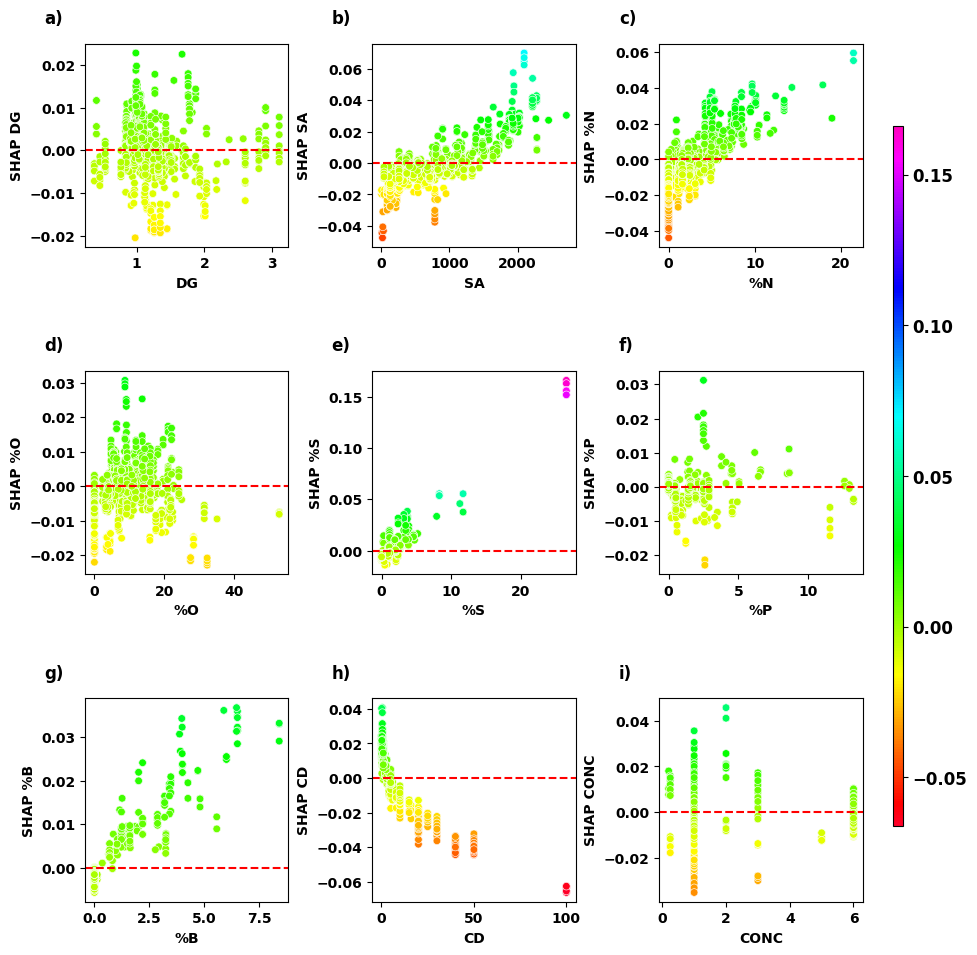

In [31]:
plot_features = results_dataframe.drop(['INDEX'],axis='columns').columns

SHAP_max = results_dataframe.drop(['INDEX'],axis='columns').max().max()
SHAP_min = results_dataframe.drop(['INDEX'],axis='columns').min().min()

print(SHAP_max)
print(SHAP_min)

max_row = int(np.ceil(np.sqrt(len(plot_features))))
max_col = max_row
current_row = 0
current_col = -1
fig = plt.figure(figsize=(10,10))
for feature_count,features in enumerate(plot_features):
    current_col = current_col + 1
    if current_col == max_col:
        current_col = 0
        current_row = current_row + 1
    ax = plt.subplot2grid((max_row,max_col),(current_row,current_col),fig=fig)
    # ax.scatter(additional_dataframe[features],results_dataframe[features],color='blue',s=5)
    sns.scatterplot(x=additional_dataframe[features],y=results_dataframe[features],cmap='gist_rainbow',c=results_dataframe[features],s=30,norm=plt.Normalize(vmin=SHAP_min,vmax=SHAP_max))

    ax.set_xlabel(features,size=font_size_plot-2)
    ax.set_ylabel(f'SHAP {features}',size=font_size_plot-2)
    ax.axhline(y=0,linestyle='--',linewidth=1.5,color='red')
    ax.tick_params(axis='both',which='major',labelsize=font_size_plot-2)
    ax.set_box_aspect(1)
    
    ax_label = 'abcdefghijklmnopqrstuvwxyz'
    ax.text(x=-0.2,y=1.1,s=f'{ax_label[feature_count]})',transform=ax.transAxes,size=font_size_plot)

fig.tight_layout()

fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.9,0.15,0.01,0.7])
fig.colorbar(matplotlib.cm.ScalarMappable(norm=(matplotlib.colors.Normalize(SHAP_min,SHAP_max)),cmap='gist_rainbow'),cax=cbar_ax)

fig.savefig('SHAP.jpg',dpi=fig.dpi)

# performance

In [32]:
meta_model = 'LIN'
method = 'FPI'
results_path = '\\'.join(path.split('\\')[:-1])+f'\\best tuned model and method\\Results'
results_path = f'{results_path}\\{method}CSVMETA{meta_model}\\PREDICTION{method}{meta_model}.csv'
results_dataframe = pd.read_csv(results_path)
print(results_dataframe.drop(['ORDER'],axis='columns').mean())
# results_dataframe = results_dataframe.drop(['SEED','ORDER'],axis='columns')
# print(results_dataframe.to_string())
# additional_dataframe_path = '\\'.join(results_path.split('\\')[:-1])+f'\\ADDITIONAL{method}{meta_model}.csv'
# additional_dataframe = pd.read_csv(additional_dataframe_path)
# additional_dataframe = additional_dataframe.drop(['SEED','ORDER'],axis='columns')
# print(additional_dataframe.to_string())

MAE       46.118877
MSE     3748.805194
RMSE      61.227487
R2         0.489082
MAPE       0.678373
TIME       0.001527
SEED       2.000000
dtype: float64
